In [1]:
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")         

Importing Test & Training Data

In [3]:
train = pd.read_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Medical Cost Prediction\train_data.csv',index_col=6)
test = pd.read_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Medical Cost Prediction\test_data.csv',index_col=6)

In [4]:
print(train.shape)
print(test.shape)

(1003, 7)
(335, 6)


In [5]:
train.head()

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
693,24,male,23.655,0,no,northwest,2352.96845
1297,28,female,26.510,2,no,southeast,4340.44090
634,51,male,39.700,1,no,southwest,9391.34600
1022,47,male,36.080,1,yes,southeast,42211.13820
178,46,female,28.900,2,no,southwest,8823.27900


In [6]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
train.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,13267.935817
std,14.039105,6.013107,1.204619,12051.356547
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,4780.839400
50%,39.000000,30.200000,1.000000,9447.382400
75%,51.000000,34.430000,2.000000,16840.667970
max,64.000000,53.130000,5.000000,62592.873090


In [8]:
train.skew()

age         0.036805
bmi         0.289540
children    0.910284
charges     1.526521
dtype: float64

<AxesSubplot:>

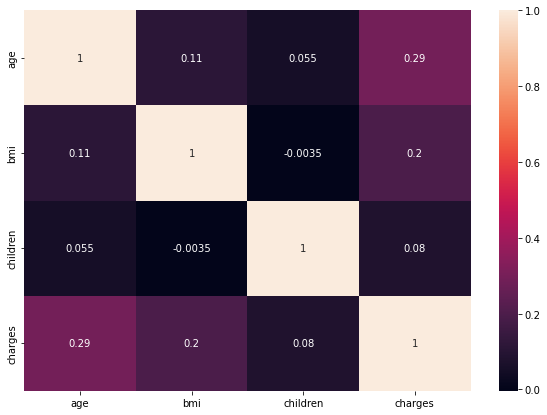

In [9]:
plt.figure(figsize = (10,7))
sns.heatmap(train.corr(),annot=True)

In [10]:
train.head()

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
693,24,male,23.655,0,no,northwest,2352.96845
1297,28,female,26.510,2,no,southeast,4340.44090
634,51,male,39.700,1,no,southwest,9391.34600
1022,47,male,36.080,1,yes,southeast,42211.13820
178,46,female,28.900,2,no,southwest,8823.27900


Label Encoding of Categorical Data

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
train['sex']=le.fit_transform(train['sex'])

In [14]:
train['smoker']=le.fit_transform(train['smoker'])

In [15]:
train['region']=le.fit_transform(train['region'])

Plotting Scatter Chart understanding the correlation between Age, Region, BMI and Charges

<AxesSubplot:xlabel='age', ylabel='charges'>

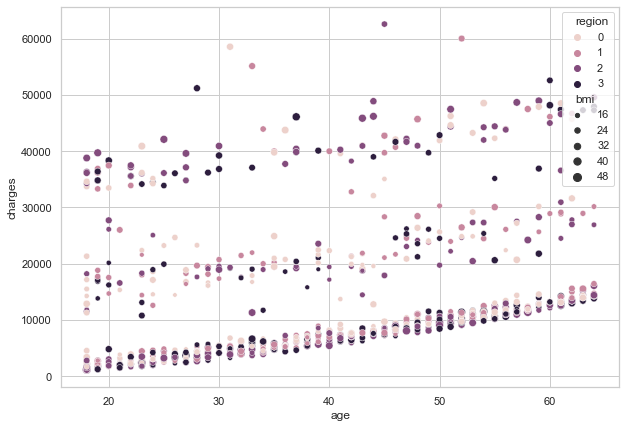

In [16]:
plt.figure(figsize = (10,7))
sns.set(style='whitegrid')
sns.scatterplot(x="age",y="charges",hue="region",size="bmi",data=train)

Dropping unrequired columns

In [17]:
train.drop(['children'],inplace=True, axis=1)
train.drop(['sex'],inplace=True, axis=1)
train.drop(['region'],inplace=True, axis=1)
train.head()

,age,bmi,smoker,charges
id,,,,
693,24,23.655,0,2352.96845
1297,28,26.510,0,4340.44090
634,51,39.700,0,9391.34600
1022,47,36.080,1,42211.13820
178,46,28.900,0,8823.27900


In [18]:
train.head()

,age,bmi,smoker,charges
id,,,,
693,24,23.655,0,2352.96845
1297,28,26.510,0,4340.44090
634,51,39.700,0,9391.34600
1022,47,36.080,1,42211.13820
178,46,28.900,0,8823.27900


In [19]:
X=train.iloc[:,:3]
y=train['charges']

In [20]:
X.head()

,age,bmi,smoker
id,,,
693,24,23.655,0
1297,28,26.510,0
634,51,39.700,0
1022,47,36.080,1
178,46,28.900,0


In [21]:
print(X.shape)
print(y.shape)

(1003, 3)
(1003,)


Splitting Data in Test & Train

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)

In [23]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (802, 3)
y_train shape:  (802,)

Test cases as below
X_test shape:  (201, 3)
y_test shape:  (201,)


Implementing Linear Regression

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

In [25]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -12749.871894945547
Coefficients: [  267.89165334   350.80544771 23385.22327939]


In [26]:
y_pred_train = linreg.predict(X_train)  

In [27]:
y_pred_test = linreg.predict(X_test)           # make predictions on the testing set

Text(0, 0.5, 'Predicted Values')

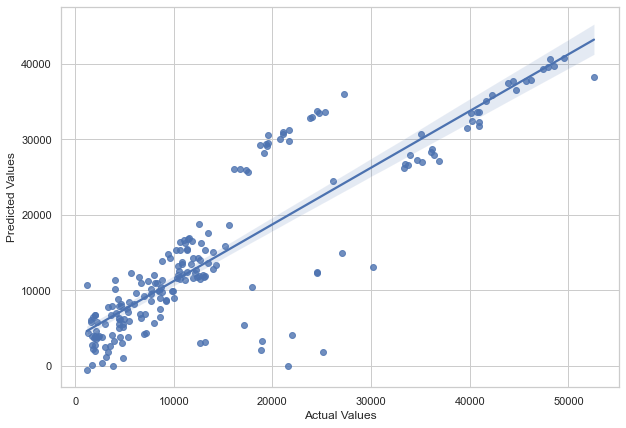

In [28]:
plt.figure(figsize = (10,7))
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [29]:
from sklearn import metrics

In [30]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 4164.147539513895
MAE for test set is 4744.247456137672


In [31]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 36839622.20282757
MSE for test set is 39823550.0308564


In [32]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 6069.565240017408
RMSE for test set is 6310.590307638137


In [36]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.7339668210575623
R2 score for test set is 0.763051395586897


In [35]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.7329666963246959
Adjusted R2 score for test set is 0.7594430412049716


In [37]:
test['sex']=le.fit_transform(test['sex'])
test['children']=le.fit_transform(test['children'])
test['region']=le.fit_transform(test['region'])
test.head()

,age,sex,bmi,children,smoker,region
id,,,,,,
764,45,0,25.175,2,no,0
887,36,0,30.020,0,no,1
890,64,0,26.885,0,yes,1
1293,46,1,25.745,3,no,1
259,19,1,31.920,0,yes,1


In [38]:
test.drop(['sex','children','region'],axis=1, inplace=True)
test.head()

,age,bmi,smoker
id,,,
764,45,25.175,no
887,36,30.020,no
890,64,26.885,yes
1293,46,25.745,no
259,19,31.920,yes


In [39]:
test['smoker']=le.fit_transform(test['smoker'])


In [40]:
test.head()

,age,bmi,smoker
id,,,
764,45,25.175,0
887,36,30.020,0
890,64,26.885,1
1293,46,25.745,0
259,19,31.920,1


In [41]:
y_pred_test_sample = linreg.predict(test)

In [54]:
test['Predicted']=y_pred_test_sample

In [55]:
test.head()

,Predicted
id,
764,8136.779652
887,7425.407166
890,37211.821660
1293,8604.630410
259,26923.002689


Genrating Submission File

In [56]:
test.to_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Medical Cost Prediction\Medical Cost Submission.csv',header=False,index=True)